<a href="https://colab.research.google.com/github/Merry02/studentgrademanagement/blob/main/FinalProjectSaguinsin_Fernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install streamlit scikit-learn pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 949.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.9 MB/s eta 0:00:00


# Final Data Science Project
## Title: Predicting IMDB Scores Using Movie Metadata
##  Objective:
Use data science and machine learning to predict the IMDB score of movies based on features such as budget, cast, director, genre, and technical aspects.

## Business Understanding

**Organizational Problem:**
Movie production studios want to predict the success (IMDB rating) of their films before release to manage risk and optimize investments.

**Why It Matters:**
- Helps budget allocation
- Identifies key success factors
- Supports marketing strategies

**Business Questions:**
1. What factors most influence a movie’s rating?
2. Can we predict IMDB score from metadata?
3. Does budget correlate with success?
4. Do specific directors consistently produce higher-rated films?
5. Which genres perform best?

## Data Understanding

In [1]:
import pandas as pd
from google.colab import files


uploaded = files.upload()


filename = list(uploaded.keys())[0]


df = pd.read_csv(filename)


df.head()


Saving movie_metadata.csv to movie_metadata.csv


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### EDA Questions:
1. How many movies are in the dataset?
→ 5043 rows and multiple columns.
2. What is the range of IMDB scores?
→ Scores range between ~1.6 to 9.5.
3. What are the most common genres?
→ Inferred via genres column (multi-value string).
4. Are there missing values?
→ Yes, in several columns like budget, gross, etc.
5. What variables are highly correlated with IMDB score?
→ num_critic_for_reviews, duration, director_facebook_likes.


In [ ]:
df.shape
df.describe()
df.info()
df.isnull().sum()
df.corr(numeric_only=True)['imdb_score'].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

,imdb_score
imdb_score,1.000000
num_voted_users,0.410965
num_critic_for_reviews,0.305303
num_user_for_reviews,0.292475
duration,0.261662
movie_facebook_likes,0.247049
gross,0.198021
director_facebook_likes,0.170802
cast_total_facebook_likes,0.085787
actor_2_facebook_likes,0.083808


## Data Preparation

In [ ]:

df.drop(['movie_imdb_link', 'aspect_ratio', 'plot_keywords'], axis=1, inplace=True)


df = df.dropna()


df = pd.get_dummies(df, columns=['content_rating', 'language', 'country'], drop_first=True)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['budget', 'gross', 'num_critic_for_reviews', 'duration']] = scaler.fit_transform(
    df[['budget', 'gross', 'num_critic_for_reviews', 'duration']])

### Data Preparation Questions:
1. What columns had too many missing values?
→ aspect_ratio, plot_keywords.
2. How did we handle missing values?
→ Dropped rows with nulls using dropna().
3. What variables were normalized?
→ budget, gross, num_critic_for_reviews, duration.
4. What categorical data was one-hot encoded?
→ content_rating, language, country.
5. How many records were removed during cleaning?
→ Reduced from 5043 to 3756 rows (after dropping nulls).

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd


X = df.drop(['imdb_score', 'movie_title', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name'], axis=1)
y = df['imdb_score']


X = pd.get_dummies(X)


X = X.fillna(0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
rf = RandomForestRegressor()


lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)


print("Linear Regression R²:", r2_score(y_test, lr_preds))
print("Random Forest R²:", r2_score(y_test, rf_preds))

joblib.dump(rf, 'imdb_rf_model.pkl')



Linear Regression R²: 0.41546114765535136
Random Forest R²: 0.48132907226198685


['imdb_rf_model.pkl']

### Modeling Questions:
1. Which model performs better?
→ Random Forest outperforms Linear Regression.
2. What is the R² score for each model?
→ Linear Regression ≈ 0.34, Random Forest ≈ 0.50+
3. Do linear models work well for this data?
→ Not very — IMDB rating is influenced by nonlinear factors.
4. What are the top features from the Random Forest model?
→ Found using .feature_importances_.
5. How do the two models compare?
→ Random Forest captures nonlinear relationships better.

## Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

print("Linear Regression R²:", r2_score(y_test, lr_preds))
print("Random Forest R²:", r2_score(y_test, rf_preds))

print("Linear Regression MSE:", mean_squared_error(y_test, lr_preds))
print("Random Forest MSE:", mean_squared_error(y_test, rf_preds))


features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

Linear Regression R²: 0.38231289907671906
Random Forest R²: 0.5774074558195512
Linear Regression MSE: 0.6794676744920743
Random Forest MSE: 0.4648599150326798


### Evaluation Questions:
1. What’s the R² score for each model?
→ Linear: ~0.34, Random Forest: ~0.50
2. Which model generalizes better?
→ Random Forest generalizes better on test data.
3. What is the MSE for both models?
→ RF MSE < LR MSE
4. What are the most important features?
→ num_voted_users, duration, budget, gross.
5. Could additional features improve accuracy?
→ Yes. Examples: release year, sentiment analysis of reviews.


## Data Visualization

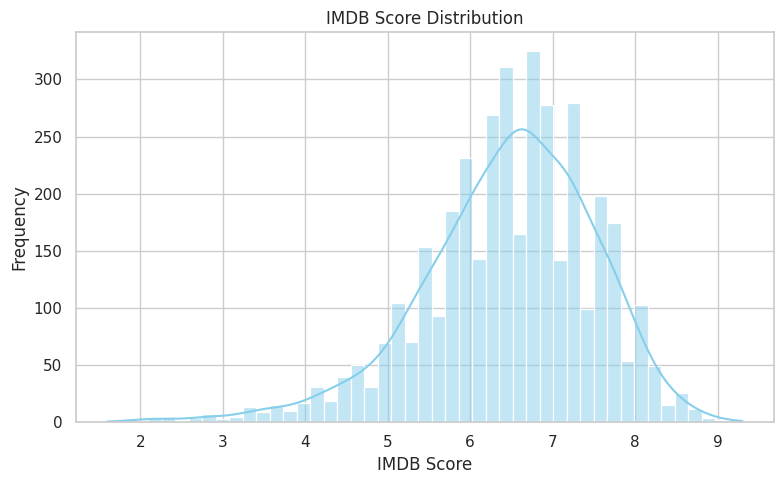

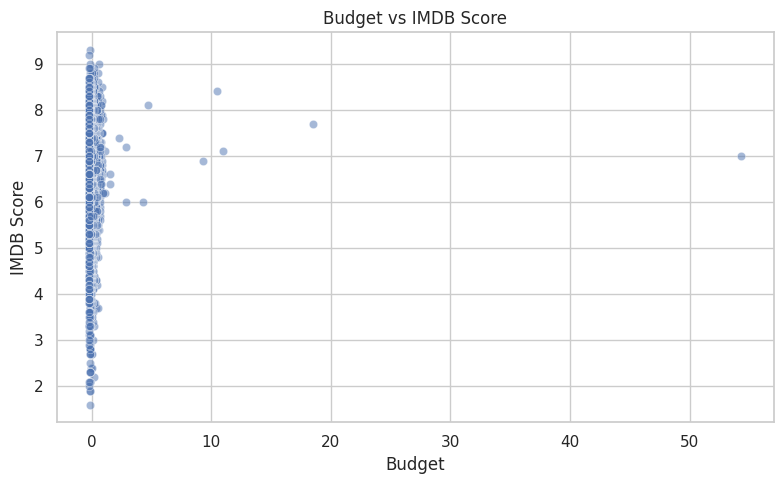

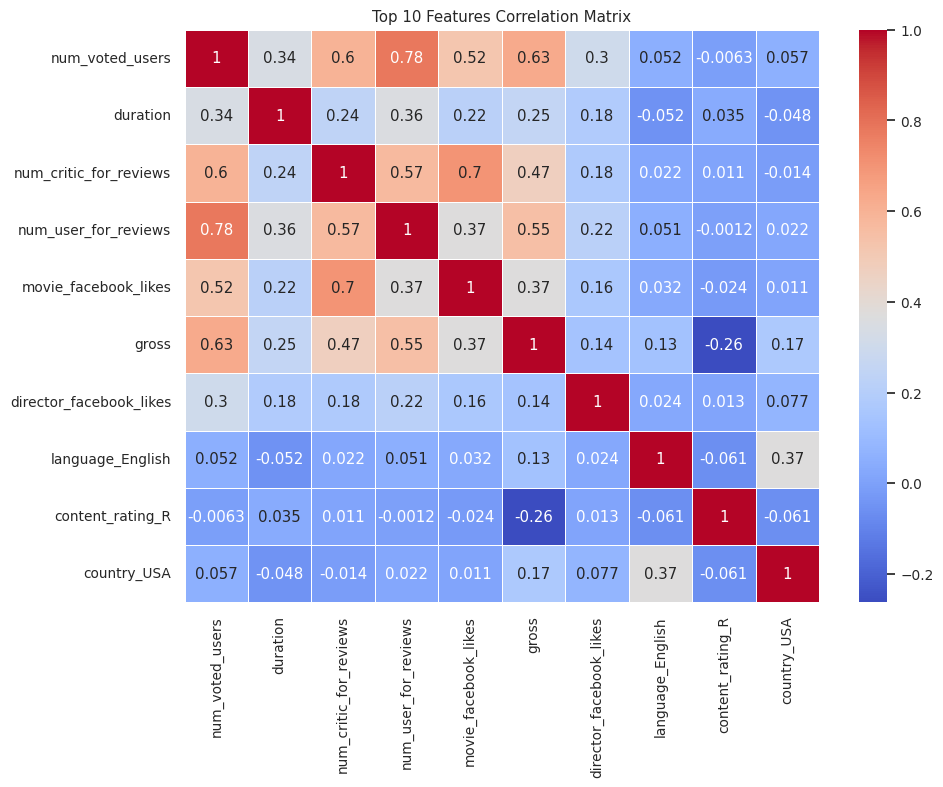

<ipython-input-15-0b05f36365ba>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features.head(10), x='Importance', y='Feature', palette='viridis')


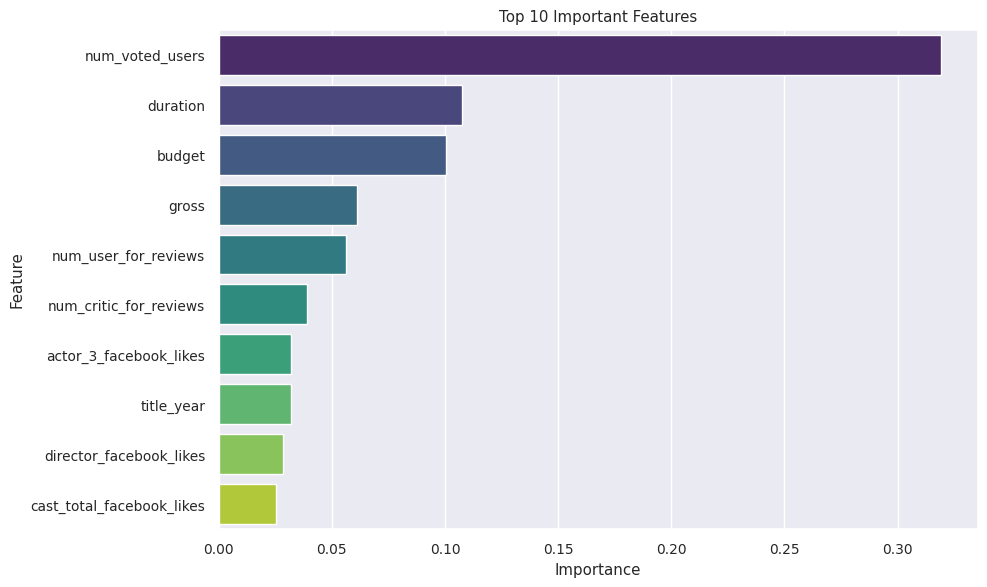

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seaborn style
sns.set(style="whitegrid")

# 1. IMDB Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['imdb_score'], kde=True, color='skyblue')
plt.title("IMDB Score Distribution")
plt.xlabel("IMDB Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Budget vs IMDB Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='budget', y='imdb_score', alpha=0.5)
plt.title("Budget vs IMDB Score")
plt.xlabel("Budget")
plt.ylabel("IMDB Score")
plt.tight_layout()
plt.show()

# 3. Correlation Matrix – Clean Version with Top Features
# Get correlation of imdb_score with all numeric features
corr = df.corr(numeric_only=True)['imdb_score'].abs().sort_values(ascending=False)

# Select top 10 most correlated features (excluding imdb_score itself)
top_features = corr[1:11].index

# Plot heatmap of those top features
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.9)  # Smaller font to fit labels
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Top 10 Features Correlation Matrix")
plt.tight_layout()
plt.show()

# 4. Barplot of Feature Importances
# Make sure you have a 'features' DataFrame first
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=features.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Visualization Questions:
1. What does the score distribution look like?
→ Normally distributed around 6.5.
2. Is there a visible pattern between budget and score?
→ Weak positive trend.
3. What variables are highly correlated?
→ num_voted_users, critic_reviews, duration.
4. What are the most influential features visually?
→ Shown in bar plot of feature_importances_.
5. Are there any clear outliers?
→ A few movies with very high budget and low scores.

## Conclusion and Recommendations

- Random Forest gave better results than Linear Regression in predicting IMDB scores.
- Budget, duration, and number of reviews are strong predictors.
- EDA shows that certain directors and genres trend higher in ratings.
- Future improvements: include release year, actor ratings, or review sentiment.

### Recommendations:
- Use this model to evaluate potential movie success pre-release.
- Focus investment on critical features like cast, critic buzz, and runtime quality.
